Context
If you are like me, you might get overwhelmed when having to make big decisions such as buying a house. In such cases, I always like to go for a data driven approach, that will help me find an optimum solution. This involves two steps. First, we need to gather as much data as we can. Second, we need to define a metric for success.

Gathering housing prices requires some effort. A caveat is that the asking prices are not the prices to which the houses were actually sold. Defining a metric for success is somewhat subjective. I consider a house to be a good option if the house price is cheap compared to other listings in the area.

Content
The housing prices have been obtained from Pararius.nl as a snapshot in August 2021. The original data provided features such as price, floor area and the number of rooms. The data has been further enhanced by utilising the Mapbox API to obtain the coordinates of each listing.

Acknowledgements
Thanks to Pararius

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("resources/HousingPrices-Amsterdam-August-2021.csv", parse_dates=True,)

In [4]:
df = data.drop("Unnamed: 0", axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
Address    924 non-null object
Zip        924 non-null object
Price      920 non-null float64
Area       924 non-null int64
Room       924 non-null int64
Lon        924 non-null float64
Lat        924 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [6]:
df.drop("Address", axis = 1, inplace=True)

In [7]:
df["Zip"] = pd.to_numeric([x.split(" ")[0] for x in df["Zip"]])

## Visualizations

In [8]:
sns.pairplot(df)

### Dropping Missing Data
- Not m any items missing so we will drop those from the dataset 

In [9]:
df.dropna(inplace=True)

# Converting Ticket to Numeric

In [10]:
sns.lmplot(x="Area", y = "Price", data = df)

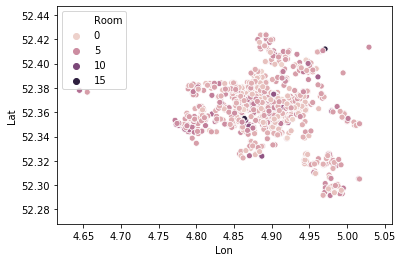

In [11]:
sns.scatterplot(x="Lon", y = "Lat", data= df, hue="Room")

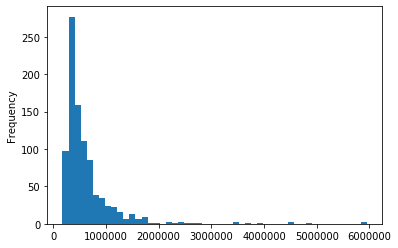

In [12]:
df["Price"].plot(kind = "hist", bins = 50)

In [13]:
df[df["Price"] > 5000000]

Zip      Price  Area  Room       Lon        Lat
195  1017  5950000.0   394    10  4.887378  52.365078
837  1075  5850000.0   480    14  4.863729  52.354874

In [14]:
df

Zip     Price  Area  Room       Lon        Lat
0    1091  685000.0    64     3  4.907736  52.356157
1    1059  475000.0    60     3  4.850476  52.348586
2    1097  850000.0   109     4  4.944774  52.343782
3    1060  580000.0   128     6  4.789928  52.343712
4    1036  720000.0   138     5  4.902503  52.410538
..    ...       ...   ...   ...       ...        ...
919  1097  750000.0   117     1  4.927757  52.354173
920  1033  350000.0    72     3  4.890612  52.414587
921  1058  350000.0    51     3  4.856935  52.363256
922  1095  599000.0   113     4  4.965731  52.375268
923  1068  300000.0    79     4  4.810678  52.355493

[920 rows x 6 columns]

### Coorelation Analisis 
- Heat map visualization

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

## Area is the mose coorelated to the target feture Price

In [20]:
df.corrwith(df["Price"])

Zip     -0.219669
Price    1.000000
Area     0.835090
Room     0.623448
Lon     -0.013561
Lat      0.062196
dtype: float64

# Rooms Analysis 
- The more rooms them higher the prices 

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "Room", y = "Price", data =df)

### Average Room Count
- The average room count for the houses in this data set is 3

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Room", data =df, palette="magma")

# Zip Analysis

In [27]:
df["Zip"].nunique()

70

In [35]:
zip_Group = df.groupby("Zip").max()

In [36]:
zip_Group.head(5)

Price  Area  Room       Lon        Lat
Zip                                             
1011  1500000.0   257     9  4.910725  52.376281
1012  4495000.0   213     7  4.901320  52.376702
1013  1950000.0   258     6  4.893924  52.395229
1014  1450000.0   158     4  4.886388  52.394178
1015  3500000.0   348     8  4.893043  52.382746

# Mose Expensive Zip 
- Appears that the zip in the area around 1020 and 1070 have some of the most of the larger homes

In [37]:
sns.scatterplot(x = zip_Group.index, y = zip_Group["Area"], data = df)

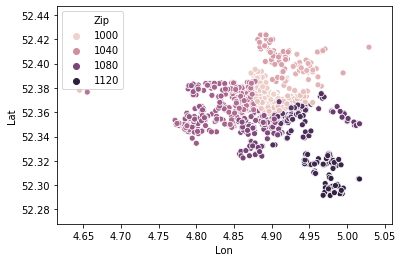

In [40]:
sns.scatterplot(x="Lon", y = "Lat", data= df, hue="Zip")

# Removinh Outliers
- there are not many homes above 3M marker in the data set above
- To get a better understanding of the data on the average homes, removing the outliers to get a better visual 
- appears the more expensive homes ate in the coordinates og 3.90 and 52.35 with some distance around
- There are some homes on the parameter of the city also of high value

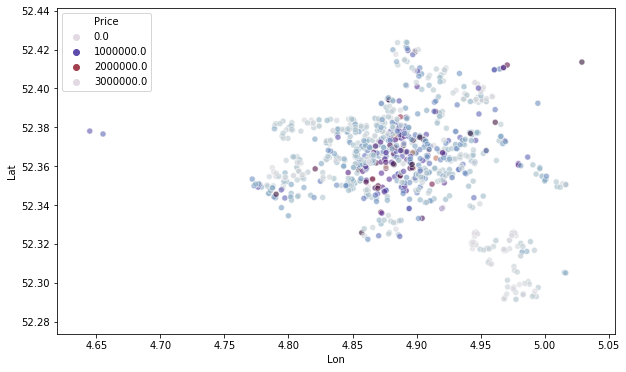

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Lon", y = "Lat", data= df[df["Price"] < 3000000], hue="Price", palette="twilight", alpha=0.6)

## Preparing the Data for Model

In [84]:
X = df.drop('Price', axis=1)
y = df["Price"]

# Train Test Split
- because we have outliers (omes with prices that are very exmensive and not many) 
- we may need to scale the data, specifically the price column
- for now we will go without

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 884 to 103
Data columns (total 5 columns):
Zip     736 non-null int64
Area    736 non-null int64
Room    736 non-null int64
Lon     736 non-null float64
Lat     736 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.5 KB


In [88]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 320 to 736
Data columns (total 5 columns):
Zip     184 non-null int64
Area    184 non-null int64
Room    184 non-null int64
Lon     184 non-null float64
Lat     184 non-null float64
dtypes: float64(2), int64(3)
memory usage: 8.6 KB


# Regression Model

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()

In [91]:
model = lr.fit(X_train, y_train)

In [92]:
model.intercept_

116887877.51474814

# Predictions

In [93]:
predicitons = model.predict(X_test)

# Metrics

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
print(mean_absolute_error(predicitons, y_test))

167860.958726933


In [96]:
print(mean_squared_error(predicitons, y_test))

60528394727.29731


In [97]:
print(np.sqrt(mean_absolute_error(predicitons, y_test)))

409.7083825441371


# Prediction Visual
- Model seems to be accurate with a root means quared error of only 409 with prices this high for homes 
- Mean ab error of 167860 is not too far off as well

In [100]:
mod_eval = pd.DataFrame(y_test)

In [102]:
mod_eval["predicitons"] = predicitons

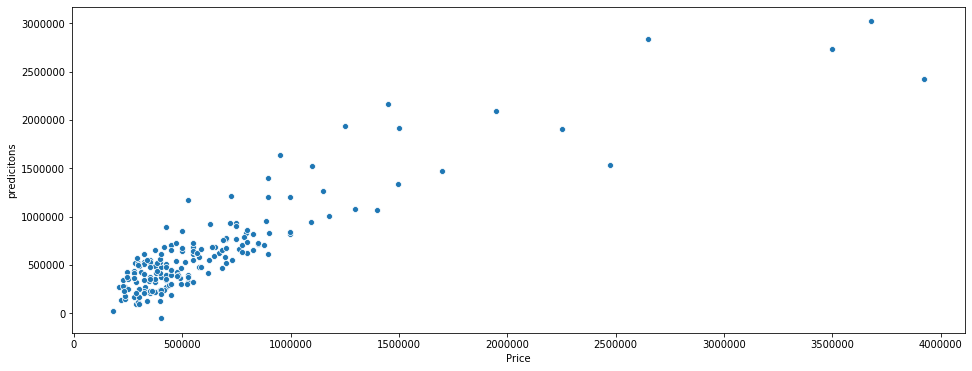

In [106]:
plt.figure(figsize=(16,6))
sns.scatterplot(x = "Price", y = "predicitons", data = mod_eval)

# Radom data
- We will use a random method to test our model against rendom homes 
- since we do not have new data this will simulate how the model will make predictions when we so
- so we will use the entire data for this

In [109]:
X_test.values.shape

(184, 5)

In [129]:
from random import randint
random_index = randint(0, len(df))
random_home = df.drop("Price", axis = 1).iloc[random_index]

In [130]:
random_home

Zip     1051.000000
Area      41.000000
Room       2.000000
Lon        4.867456
Lat       52.375584
Name: 455, dtype: float64

- we need to reshape for proper processing

In [131]:
random_home.values.shape

(5,)

In [132]:
new_home = random_home.values.reshape(1,5)

# Model Prediciton on New Home

In [133]:
model.predict(new_home)[0]

211783.50079466403

## True Value

In [134]:
df.iloc[random_index]

Zip        1051.000000
Price    300000.000000
Area         41.000000
Room          2.000000
Lon           4.867456
Lat          52.375584
Name: 455, dtype: float64

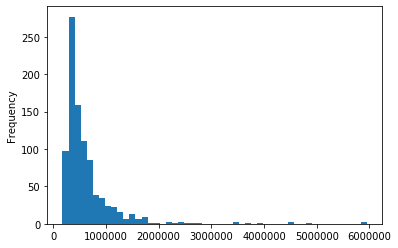

In [135]:
df["Price"].plot(kind = "hist", bins = 50)